# CUS (format = AEB_intern)

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


import_declarations = pd.read_csv('../../data/Data-AEB_INTERN_CUS_20240227-1100.csv', sep=';')

In [93]:
import_declarations.head(n=15)

,Abgabenbescheid / Zoll,Abgabenbescheid / EUSt,Abgabenbescheid / Gesamtabgabe,Abgabenbescheid / Datum Erstellung
0,"0,00","28,50","28,50",27.02.2024
1,"0,00","4,87","4,87",27.02.2024
2,"0,00","3,05","3,05",27.02.2024
3,"0,00","3,05","3,05",27.02.2024
4,"0,00","3,05","3,05",27.02.2024
5,"0,00","3,05","3,05",27.02.2024
6,"0,00","3,05","3,05",27.02.2024
7,"0,00","2044,78","2044,78",27.02.2024
8,"0,00","3,86","3,86",27.02.2024
9,"427,70","1331,46","1759,16",27.02.2024


In [94]:
import_declarations['Abgabenbescheid / Datum Erstellung'].value_counts()

Abgabenbescheid / Datum Erstellung
16.02.2024    123
13.02.2024    118
22.02.2024     98
20.02.2024     96
27.02.2024     91
23.02.2024     90
21.02.2024     89
14.02.2024     82
15.02.2024     75
24.02.2024     73
10.02.2024     33
19.02.2024     15
17.02.2024     14
26.02.2024      2
12.02.2024      1
Name: count, dtype: int64

In [95]:
pd.to_datetime(import_declarations['Abgabenbescheid / Datum Erstellung'], format='%d.%m.%Y')

import_declarations['Abgabenbescheid / Datum Erstellung'].value_counts()

Abgabenbescheid / Datum Erstellung
16.02.2024    123
13.02.2024    118
22.02.2024     98
20.02.2024     96
27.02.2024     91
23.02.2024     90
21.02.2024     89
14.02.2024     82
15.02.2024     75
24.02.2024     73
10.02.2024     33
19.02.2024     15
17.02.2024     14
26.02.2024      2
12.02.2024      1
Name: count, dtype: int64

In [96]:
import_declarations['Abgabenbescheid / Gesamtabgabe'] = import_declarations['Abgabenbescheid / Gesamtabgabe'].str.replace(',', '.').astype(float)

In [97]:
date_import_declartions = import_declarations.groupby('Abgabenbescheid / Datum Erstellung')['Abgabenbescheid / Gesamtabgabe'].sum().reset_index()

In [98]:
count_declarations_per_day = import_declarations.groupby('Abgabenbescheid / Datum Erstellung').size().reset_index(name='Amount_of_declarations_per_day')

count_declarations_per_day

,Abgabenbescheid / Datum Erstellung,Amount_of_declarations_per_day
0,10.02.2024,33
1,12.02.2024,1
2,13.02.2024,118
3,14.02.2024,82
4,15.02.2024,75
5,16.02.2024,123
6,17.02.2024,14
7,19.02.2024,15
8,20.02.2024,96
9,21.02.2024,89


In [99]:
merged_data = pd.merge(date_import_declartions, count_declarations_per_day, on='Abgabenbescheid / Datum Erstellung', how='left')
merged_data.head()

,Abgabenbescheid / Datum Erstellung,Abgabenbescheid / Gesamtabgabe,Amount_of_declarations_per_day
0,10.02.2024,2186.36,33
1,12.02.2024,1370.96,1
2,13.02.2024,25947.88,118
3,14.02.2024,18251.71,82
4,15.02.2024,17311.43,75


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '10.02.2024'),
  Text(1, 0, '12.02.2024'),
  Text(2, 0, '13.02.2024'),
  Text(3, 0, '14.02.2024'),
  Text(4, 0, '15.02.2024'),
  Text(5, 0, '16.02.2024'),
  Text(6, 0, '17.02.2024'),
  Text(7, 0, '19.02.2024'),
  Text(8, 0, '20.02.2024'),
  Text(9, 0, '21.02.2024'),
  Text(10, 0, '22.02.2024'),
  Text(11, 0, '23.02.2024'),
  Text(12, 0, '24.02.2024'),
  Text(13, 0, '26.02.2024'),
  Text(14, 0, '27.02.2024')])

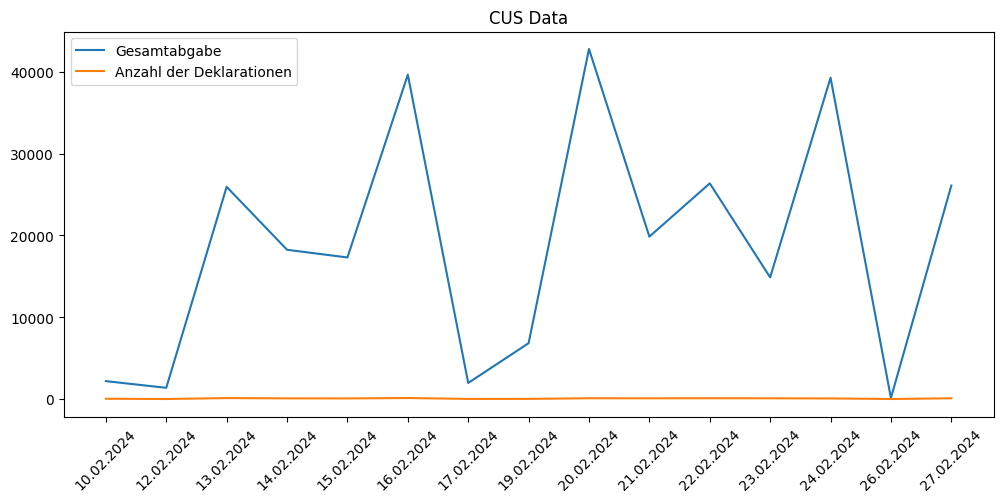

In [100]:

plt.figure(figsize=(12, 5))

plt.title('CUS Data')
plt.plot(merged_data['Abgabenbescheid / Datum Erstellung'], merged_data['Abgabenbescheid / Gesamtabgabe'], linestyle='-', label='Gesamtabgabe')
plt.plot(merged_data['Abgabenbescheid / Datum Erstellung'], merged_data['Amount_of_declarations_per_day'], linestyle='-', label='Anzahl der Deklarationen')
plt.legend()
plt.xticks(rotation=45)

# INTERMAX (format = AEB_intern)

In [101]:
import_data_intermax = pd.read_csv('../../data/Data-AEB_INTERN_INTERMAX_20240227-1339.csv', sep=';')


import_data_intermax.head()

,Abgabenbescheid / Datum Erstellung,Abgabenbescheid / Gesamtabgabe,Abgabenbescheid / EUSt,Abgabenbescheid / Zoll
0,13.11.2014,"305,33","0,00","305,33"
1,29.01.2016,"0,00","0,00","0,00"
2,11.03.2016,"0,00","0,00","0,00"
3,11.03.2016,"0,00","0,00","0,00"
4,06.06.2016,"0,00","0,00","0,00"


In [102]:

from data_preperation import process_data

import_declarations_intermax = process_data(
    df=import_data_intermax, 
    date_column='Abgabenbescheid / Datum Erstellung',
    amount_column='Abgabenbescheid / Gesamtabgabe'
)

import_declarations_intermax.head()

,Abgabenbescheid / Datum Erstellung,Abgabenbescheid / Gesamtabgabe,Amount_of_declarations_per_day
0,2014-11-13,305.33,1
1,2016-01-29,0.00,1
2,2016-03-11,0.00,2
3,2016-06-06,0.00,1
4,2016-07-05,498.82,1


(array([17167., 17287., 17410., 17532., 17652., 17775., 17897., 18017.,
        18140., 18262.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01')])

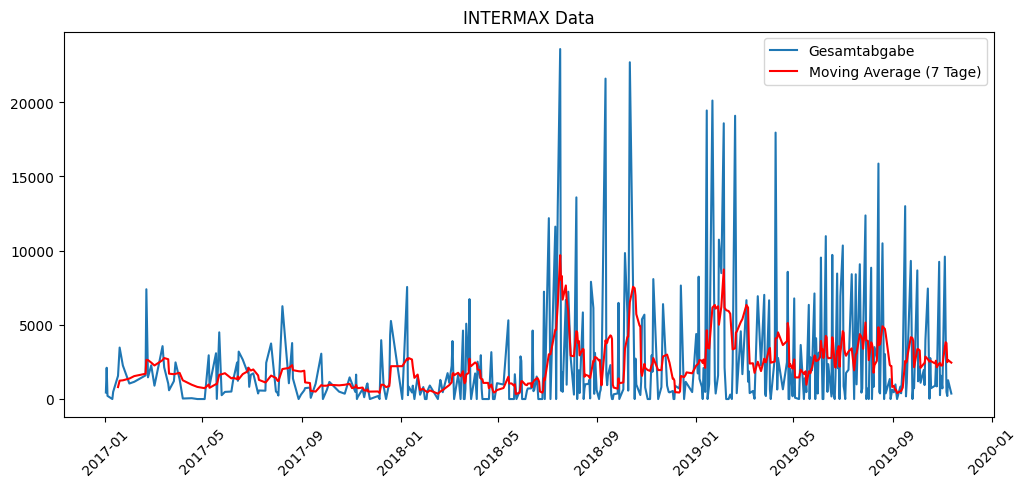

In [103]:
plt.figure(figsize=(12, 5))

filtered_df = import_declarations_intermax[(import_declarations_intermax['Abgabenbescheid / Datum Erstellung'] >= '2017-01-01') & 
                                           (import_declarations_intermax['Abgabenbescheid / Datum Erstellung'] <= '2024-12-31')]

plt.title('INTERMAX Data')
plt.plot(filtered_df['Abgabenbescheid / Datum Erstellung'], filtered_df['Abgabenbescheid / Gesamtabgabe'], linestyle='-', label='Gesamtabgabe')

window_size = 7
moving_avg = filtered_df['Abgabenbescheid / Gesamtabgabe'].rolling(window=window_size).mean()
plt.plot(filtered_df['Abgabenbescheid / Datum Erstellung'], moving_avg, linestyle='-', color='red',  label=f'Moving Average ({window_size} Tage)')


plt.legend()
plt.xticks(rotation=45)

In [104]:
moving_avg

35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
          ...     
455    3827.831429
456    3774.345714
457    2482.552857
458    2625.337143
459    2453.715714
Name: Abgabenbescheid / Gesamtabgabe, Length: 425, dtype: float64

In [105]:
import_declarations_intermax_movingavg = pd.DataFrame()

import_declarations_intermax_movingavg['Abgabe'] = moving_avg.values
import_declarations_intermax_movingavg['Date'] = filtered_df['Abgabenbescheid / Datum Erstellung'].values
import_declarations_intermax_movingavg['Abgabe'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Abgabe, dtype: float64

In [106]:
import_declarations_intermax_movingavg.to_csv('../../data/processed/import_declarations_intermax_movingavg.csv', index=False)

(array([17167., 17287., 17410., 17532., 17652., 17775., 17897., 18017.,
        18140., 18262.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01')])

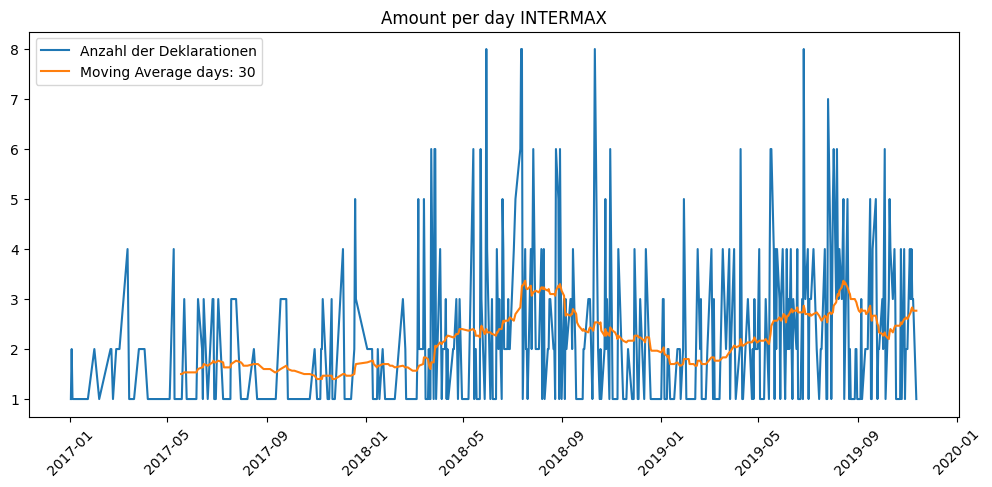

In [107]:
plt.figure(figsize=(12, 5))
plt.title('Amount per day INTERMAX')

window_size_days = 30
plt.plot(filtered_df['Abgabenbescheid / Datum Erstellung'], filtered_df['Amount_of_declarations_per_day'], linestyle='-', label='Anzahl der Deklarationen')
moving_avg_amount = filtered_df['Amount_of_declarations_per_day'].rolling(window=window_size_days).mean()
plt.plot(filtered_df['Abgabenbescheid / Datum Erstellung'], moving_avg_amount, linestyle='-', label=f'Moving Average days: {window_size_days}')
plt.legend()
plt.xticks(rotation=45)

## INTERMAX on Weekly Level

In [108]:
weekly_sum = import_declarations_intermax.groupby(import_declarations_intermax['Abgabenbescheid / Datum Erstellung'].dt.to_period('W')).agg({'Abgabenbescheid / Gesamtabgabe': 'sum'})



In [109]:
weekly_sum.head()

,Abgabenbescheid / Gesamtabgabe
Abgabenbescheid / Datum Erstellung,
2014-11-10/2014-11-16,305.33
2016-01-25/2016-01-31,0.00
2016-03-07/2016-03-13,0.00
2016-06-06/2016-06-12,0.00
2016-07-04/2016-07-10,2519.35


(array([16071., 16436., 16801., 17167., 17532., 17897., 18262.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020')])

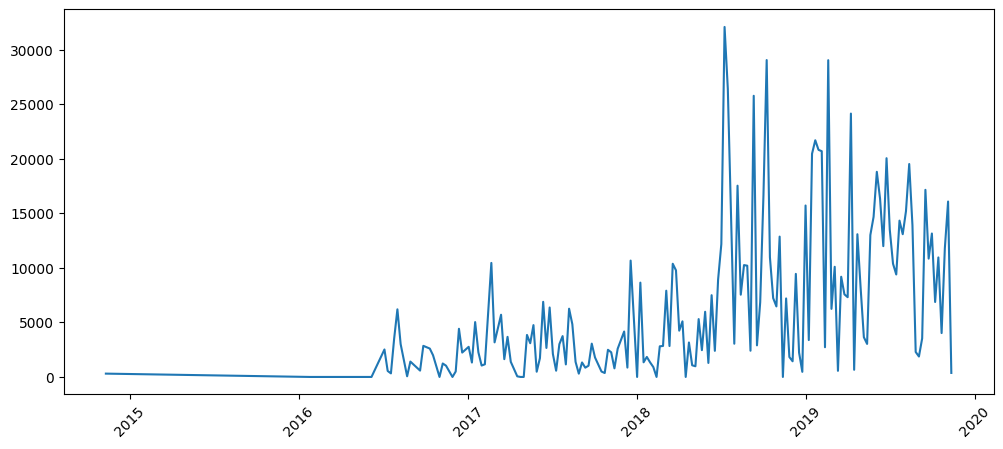

In [110]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_sum.index.start_time, weekly_sum['Abgabenbescheid / Gesamtabgabe'], linestyle='-', label='Anzahl der Deklarationen')
plt.xticks(rotation=45)

In [111]:
weekly = pd.DataFrame()

weekly['Date'] = weekly_sum.index
weekly['Abgabe'] = weekly_sum.values

weekly

,Date,Abgabe
0,2014-11-10/2014-11-16,305.33
1,2016-01-25/2016-01-31,0.00
2,2016-03-07/2016-03-13,0.00
3,2016-06-06/2016-06-12,0.00
4,2016-07-04/2016-07-10,2519.35
...,...,...
162,2019-10-14/2019-10-20,10959.08
163,2019-10-21/2019-10-27,4023.65
164,2019-10-28/2019-11-03,11805.09
165,2019-11-04/2019-11-10,16086.72


In [112]:
weekly.to_csv('../../data/processed/import_declarations_intermax_weekly.csv', index=False)

In [113]:
import_declarations_intermax.to_csv('../../data/processed/import_declarations_intermax.csv', index=False)

In [114]:
import_declarations_intermax

,Abgabenbescheid / Datum Erstellung,Abgabenbescheid / Gesamtabgabe,Amount_of_declarations_per_day
0,2014-11-13,305.33,1
1,2016-01-29,0.00,1
2,2016-03-11,0.00,2
3,2016-06-06,0.00,1
4,2016-07-05,498.82,1
...,...,...,...
455,2019-11-05,4538.82,3
456,2019-11-06,478.90,4
457,2019-11-07,205.68,3
458,2019-11-08,1265.71,3


In [115]:

data = pd.DataFrame()

data['Date'] = import_declarations_intermax['Abgabenbescheid / Datum Erstellung']
data['Abgabe'] = import_declarations_intermax['Abgabenbescheid / Gesamtabgabe']

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data = data.loc['2017':]


df_daily = data.resample('D').asfreq().fillna(0)

df_daily.to_csv('../../data/processed/import_declarations_intermax_daily.csv', index=True)

# New approach

In [116]:
data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Abgabe
Date,
2017-01-02,439.79
2017-01-03,2107.94
2017-01-04,215.37
2017-01-05,0.00
2017-01-06,0.00


<Axes: title={'center': 'Moving Average of Intermax declerations'}, xlabel='Date'>

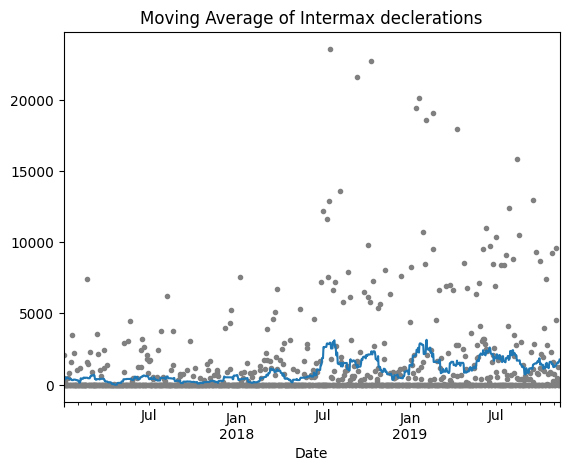

In [117]:
moving_avg = data['Abgabe'].rolling(window=30, center=True, min_periods=15).mean()

ax = data['Abgabe'].plot(style='.', color='0.5')
moving_avg.plot(
    ax=ax, title="Moving Average of Intermax declerations", legend=False,
)

In [118]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=moving_avg.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.set_index(data.index)

,const,trend
Date,,
2017-01-02,1.0,1.0
2017-01-03,1.0,2.0
2017-01-04,1.0,3.0
2017-01-05,1.0,4.0
2017-01-06,1.0,5.0
...,...,...
2019-11-08,1.0,1041.0
2019-11-09,1.0,1042.0
2019-11-10,1.0,1043.0


In [119]:
X['Abgabe_avg'] = moving_avg

In [120]:
from data_preperation import split_data

train, test = split_data(X, test_split=0.7)

train: 731 , test: 314


In [121]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(train.drop(columns='Abgabe_avg'), train['Abgabe_avg'])

y_pred = pd.Series(model.predict(test.drop(columns='Abgabe_avg')), index=test.index)

In [126]:
from data_preperation import get_validation_matrix

get_validation_matrix(y_pred, test['Abgabe_avg'])

{'MAE': 481.80481376692285,
 'MSE': 377635.24586472666,
 'meanMASE': inf,
 'r2': -0.43659462710907304,
 'Forecast Bias': -338.7726452652577}

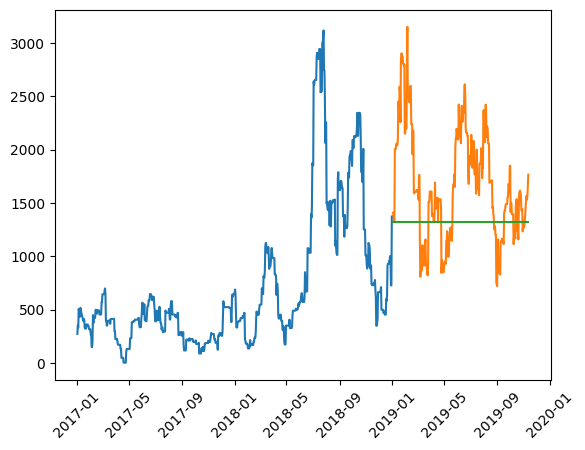

In [124]:
plt.plot(train.Abgabe_avg)
plt.plot(test.Abgabe_avg)
plt.plot(y_pred)
plt.xticks(rotation=45)
plt.show()